### Tommaso Armadillo matr. 885460

# <span style="color:red"> Numerical Exercise 9</span>

## <span style="color:blue"> Exercise 9.1</span>
#### Scope
The scope of the exercise was to so solve the travelling salesman problem using a genetic algorithm for 30 cities disposed on a circle or inside a square.

#### Instruction to compile
Code is in the folder <font face = "Courier"> Esercizio9.1 </font>. It can be compiled using <font face = "Courier"> `$make` </font> and executed with <font face = "Courier"> `$./main.exe` </font>. 
It reads the cities in input in the file 'cities.0' (if there isn't this file it generates some random cities) and produces three files as output: the average lenght of the best half population as a function of generations, the lenght of the shortest path as a function of generations, and the best path of the last generation.

#### Travelling salesman problem 
The TSP consist in finding the shortest path that links a set on $n$ cities and returns to the starting one. The total lenght of the trip is calculated through the following cost function

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

One could also use 

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

or maybe $L^{(p)}$ function, but the first one is the most common (usual distance).

To solve the proble we created a vector of 'City' class. Class 'City' is a class to store the position of a city and the vector contains so the position of all the cities we are considering. The code, the first time you run it, generates randomly the position of the cities (on a circle or inside a square) and save them in a file 'cities.0'. The following time it reads them from the file, and this is helpful in order to correct some bugs during the coding. We also created a class 'cromosome' that contains a single path. It's private member are in fact a vector of int values in which we stored to the index of the i-th city and a double containing the lenght of the path.

A genetic algorithm consists in some standard steps. First you need to generate a population. In our case we had to deal with $n=30$ cities so the population have to contain at least $n^2=900$ individuals. Every element of the population is a random path from the $n!$ possibilities. And we order the population according to their lenght with a quick sort algorithm. Now comes the genetic part: we select two individual (two parents) and with a probability of $50%$ we make a crossover, otherwise we put them in the second generation as they are. The paths are selected randomly but not from a uniform distribution. In fact paths with smaller lenght are more likely to be selected. After the crossover we can have also a random mutation to increase diversity, we introduced 5 different types of mutations and each one occours with a probability of $10%$. We order the paths we obtained and proceed with a new crossover.

We used a elitarian method, so the best path of the generation is put into the next one without crossing it with another parent and without mutations. This is not necessary but in this case helped to convergence. In fact can happen that in a generation we find the best path and we lose it in the next one, till we find it again after a crossover or a random mutation.

The five mutations are:
1. pair permutation of cities, e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ position for every city in the path (this mutation/move does not change the fitness/path-length but could be helpful for ergodicity), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 4, 5, 1, 2, 3 \right] $ for a $+2$ shift
3. shift of $+n$ positions for $m$ contiguous cities (given the presence of the previous operator, you can avoid mutations that require usage of periodic boundary conditions), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
4. permutation among $m$ contiguous cities with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 4, 5, 3, 1, 2 \right] $ for a permutation of the first 2 cities with the last 2.
5. inversion of the order in which they appear in the path of $m$ cities ($m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

The crossover operator works in this way:
given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

#### Circle
If the cities dispose in a circle it's quite easy to verify if the path is the optimal one. We generated these cities:

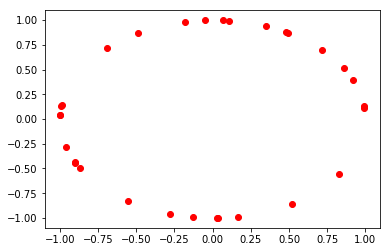

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt("Esercizio9.1/cities.round.0", usecols=(1,2), delimiter=' ', unpack='true')
plt.plot(x,y, 'ro')
plt.show()

And after $900$ generations the best path is:

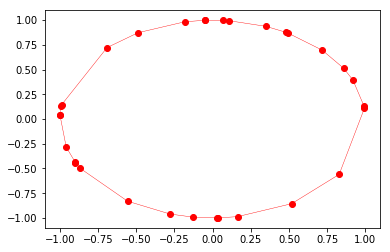

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt("Esercizio9.1/cities.round.final", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y, 'ro',linestyle='-', lw=0.4)
plt.show()

So our algorithm works fine.

Below we plotted the lenght of the shortest path as a function of generations and the mean value of the lenght of path for the best half of the population

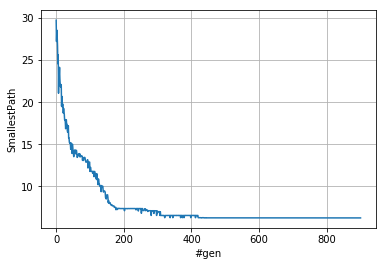

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt("Esercizio9.1/SmallestPath.round.dat", usecols=(0, 1), delimiter=' ', unpack='true')
plt.plot(x, y)
plt.xlabel('#gen')
plt.ylabel('SmallestPath')
plt.grid(True)
plt.show()

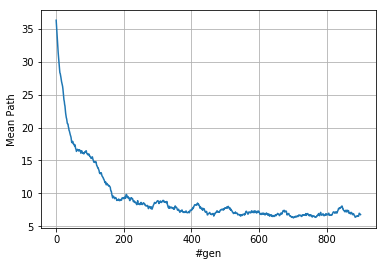

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt("Esercizio9.1/MeanPath.round.dat", usecols=(0, 1), delimiter=' ', unpack='true')
plt.plot(x, y)
plt.xlabel('#gen')
plt.ylabel('Mean Path')
plt.grid(True)
plt.show()

#### Square

The cities we generated are:

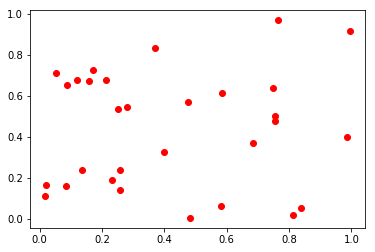

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt("Esercizio9.1/cities.square.0", usecols=(1,2), delimiter=' ', unpack='true')
plt.plot(x,y, 'ro')
plt.show()

And the best path we found is:

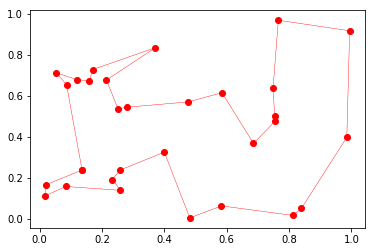

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt("Esercizio9.1/cities.square.final", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y, 'ro',linestyle='-', lw=0.4)
plt.show()

In this case it's more difficoult to understand if this path is the shortest one among all the $30!$ possibilities. The only way to be more sure is to use another algorithm (e.g. simulated annealing) and see if the results are the same.

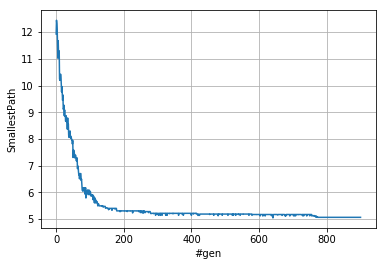

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt("Esercizio9.1/SmallestPath.square.dat", usecols=(0, 1), delimiter=' ', unpack='true')
plt.plot(x, y)
plt.xlabel('#gen')
plt.ylabel('SmallestPath')
plt.grid(True)
plt.show()

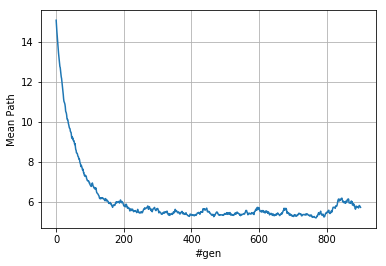

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt("Esercizio9.1/MeanPath.square.dat", usecols=(0, 1), delimiter=' ', unpack='true')
plt.plot(x, y)
plt.xlabel('#gen')
plt.ylabel('Mean Path')
plt.grid(True)
plt.show()

The fact that the final part of the shortest path leght graph is an horizontal line hints that the best path is not changing anymore, so we can be quite confident that this is the best one, even if we can't have certainty.